# Logistic Regression

This notebook continues my study of how statistical prediction and classification models are implemented in scientific computing. I took the reference from the same GLearning video as the linear regression notebook.

> By my understanding, in logistic regression, the idea of classiification is introduced, as opposed to quantifying an outcome (as seen in linear regression). Logistic regression uses the binomial distribution.   

In this case, we're trying to predict if a person will purchase a product or not (1 or 0) based on their age and salary. Other data points like user ID and gender will not be used, so we'll trim those columns.

## Importing required modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset

In [7]:
dataset = pd.read_csv("./datasets/Social_Network_Ads.csv")

## Reading through the dataset

In [8]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Filter out unused columns

In [9]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, [4]].values

## Split data for training and testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Fitting

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# model.fit(X_train, y_train)

> ### Converting column-vectors to `ndarrays`

For some reason, passing y_train as output is not working as intended. After much googling, I discovered why: the original subset of the dataset that created *y_train* was taken from a single column (i.e., `y = dataset.iloc[:, [4]].values`), which means the input data is read as a column-vector as opposed to a n-dimensional array (`ndarray`).  

There are two ways to solve  this problem and convert y_train from a vertical column vector to a proper array. We can use Python's inbuilt `ravel()` function or use Numpy's `squeeze()` method. Both return a similar output, however, they're different.



Consider the following 3-dimensional array, with a length, width (breadth), and height of 2, 3, and 5 respectively.

In [42]:
in_arr = np.array([
    [
        [1, 2, 3], [4, 5, 6],
    ],
    [
        [7, 8, 9], [10, 11, 12]
    ],
    [
        [13, 14, 15], [16, 17, 18]
    ],
    [
        [19, 20, 21], [22, 23, 24]
    ],
    [
        [25, 26, 27], [28, 29, 30]
    ]
    
])
in_arr.shape

(5, 2, 3)

> ### A quick detour into 3D Numpy arrays

You might be wondering, "well, how did you arrive at those dimensions to model it as a cube?!" I simply plotted the array using matplotlib and worked out the dimensions.

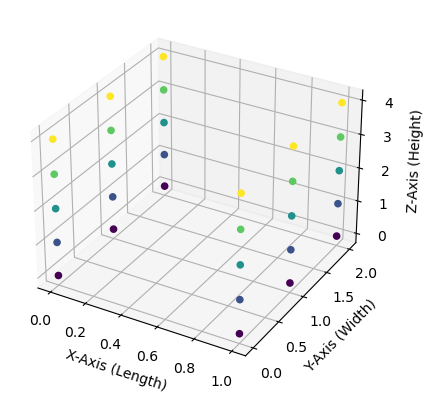

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
z, x, y = in_arr.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
ax.set_zlabel('Z-Axis (Height)')
ax.set_ylabel('Y-Axis (Width)')
ax.set_xlabel('X-Axis (Length)')
plt.show()

Here's a little poem I've written to help you remember the cubic dimensions of a 3D array returned as a tuple from the `shape()` method:

```
Though nought is tall
Unity lasts long
Breathe, two is wide
Indices are they
```

This means that calling `shape()` on a 3D array will return `(HEIGHT, LENGTH, WIDTH)`

> ### Deciding whether to use `ravel()` or `squeeze()`

Back to my argument on `ravel()`and `squeeze()`. Let's see what both methods will return as output:

In [44]:
in_arr

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]],

       [[25, 26, 27],
        [28, 29, 30]]])

In [45]:
ravel = in_arr.ravel()
ravel

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [46]:
sq = np.squeeze(in_arr)
sq

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]],

       [[25, 26, 27],
        [28, 29, 30]]])

"As you can see," calling `ravel()` simply concatenates the entire data into a single 1D array (a list, basically). This might create problems when we can't afford to sacrifice some of the data in the 3D array. This is usually the case when dealing with independent variables that have to be regarded based on the original structure of the 3D array.

> On the other hand, `squeeze()` will just trim any redundant dimensions (i.e. which are of size 1). So, if your numpy array's shape is (100, 1), this will result in an array of shape (100,), whereas the result for a numpy array of shape (100, 2) will not change, as none of the dimensions have size 1." - Stackoverflow

At this point, it's become obvious that one method flattens arrays while the other preserves the shape of 3D arrays. 

## Model Prediction

Now that we've gotten that out of the way, let's fit the model and run the prediction. This is done to see if the machine has learned the data correctly or not.

In [118]:
model.fit(X_train, np.squeeze(y_train))
y_predict = model.predict(X_test)

In [119]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Model Evaluation

Pass the testing data into it, and find the difference that exists between test and training data. The data is returned in form of a confusion matrix, which I'll map out as below:

In [114]:
cmatrix = [["Actual: YES", "True Positive", "False Positive"], ["Actual: NO", "False Negative", "True Negative"]]

df = pd.DataFrame(cmatrix, columns=["", "Predicted: YES", "Predicted: NO"], index=["", ""])
df

,,Predicted: YES,Predicted: NO
,Actual: YES,True Positive,False Positive
,Actual: NO,False Negative,True Negative


Basically, we want the values of TP and TN to be high, while minimizing the values of FP and FN. 

Again, scikit-learn has a `confusion_matrix` module for model evaluation, so let's import it. 

In [120]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

From our model's output, we can infer the values of TN and TP to be good, which means the accuracy of detection is good.  
The incorrect cases (aka FP and FN) are low. Of course, they can be zero also, which denotes 100% accuracy. However, that's difficult to attain in practice.

### Classification Report

In [121]:
cl_report = classification_report(y_test, y_predict)
print(cl_report)
print("Model accuracy is: ", (cm[0][0] + cm[1][1]) / np.sum(cm) * 100, "%")

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

Model accuracy is:  89.0 %


## Key Takeaways

So far, I've learned how to preprocess datasets, scale and fit them into both linear and logistic regression models. I also learned how to work with 3D arrays (finally!) by visualizing them using matplotlib. Apparently, column-vectors (though, 1-dimensioned) are not 1D arrays -- or `ndarrays` at all! They must be converted to a proper array (`numpy.squeeze()` can help with this). 

There are many other metrics of accuracy, including precision, recall, f1-score etc. I'll be doing more study into them (and more practicing) once I watch the statistics for data science [course](https://www.youtube.com/watch?v=innk6tpRCW0&list=PLlgLmuG_KgbbvMqAS7kSYtdLoLeURW5_b&index=7).

Bottom line: There is a vast amount of information, esp. in the area of statistical modelling. It's probably best to map out a clear learning roadmap to avoid *kangarooing*.